In [1]:
from functools import partial
import os
import time

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch

In [3]:
from equilib import Equi2Pers

from LookAround.core.improc import (
    load2numpy,
    load2torch,
    post_process_for_render,
    post_process_for_render_torch,
)
from LookAround.FindViewCorrupted.corruptions import (
    corrupt,
    get_corruption_names,
)

/home/ubuntu/.pyenv/versions/3.8.8/lib/python3.8/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [4]:
def copy_tensor(t):
    if isinstance(t, np.ndarray):
        return t.copy()
    elif torch.is_tensor(t):
        return t.clone()
    else:
        raise ValueError("ERR: cannot copy tensor")

In [5]:
# Params
height = 256
width = 256
fov = 90.0
skew = 0.0
z_down = True
sampling_mode = 'bilinear'

# variables
dtype = np.float32  # torch.float32
image_path = './test_images/pano_afearaaylllqlg.jpg'

# checks
assert os.path.exists(image_path)

In [6]:
equi2pers = Equi2Pers(
    height=height,
    width=width,
    fov_x=fov,
    skew=skew,
    z_down=z_down,
    mode=sampling_mode,
)

In [7]:
rot = {
    'roll': 0.,
    'pitch': 0 * np.pi / 180.,
    'yaw': 0 * np.pi / 180.,
}

In [8]:
if dtype in (np.float32, np.float64):
    load_func = partial(
        load2numpy,
        dtype=dtype,
        is_cv2=False
    )
else:
    load_func = partial(
        load2torch,
        dtype=dtype,
        device=device,
        is_cv2=False,
    )

In [9]:
equi = load_func(img_path=image_path)

In [10]:
sampled_img = equi2pers(copy_tensor(equi), rots=rot)
clear_img = post_process_for_render(copy_tensor(sampled_img), to_bgr=False)

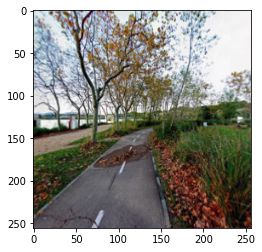

In [11]:
plt.imshow(clear_img)

In [12]:
img = copy_tensor(clear_img)

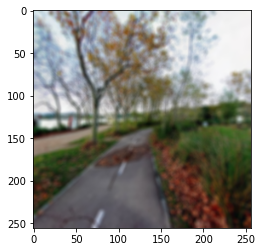

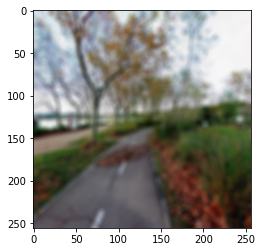

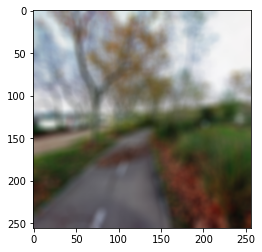

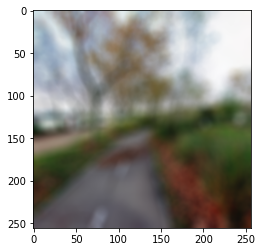

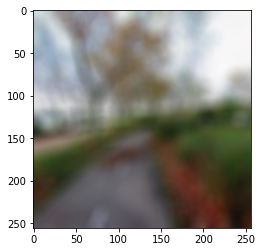

defocus_blur 0.6709575653076172


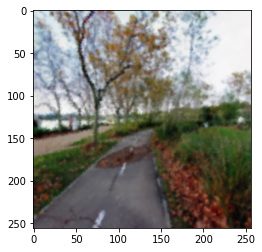

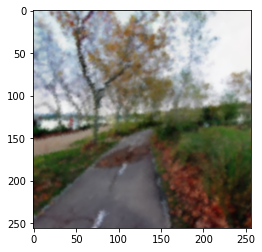

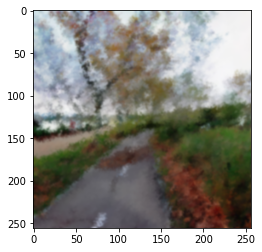

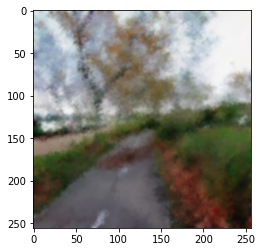

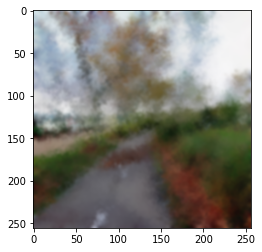

glass_blur 0.6946282386779785


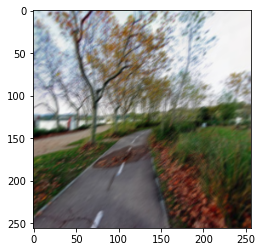

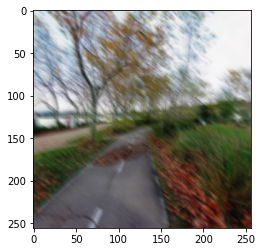

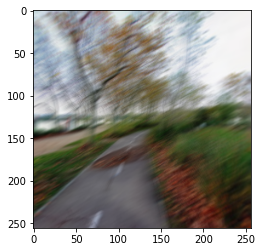

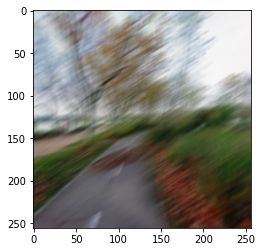

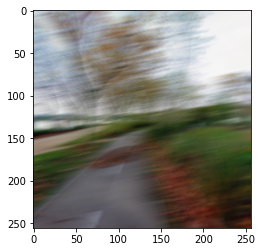

motion_blur 0.6391222476959229


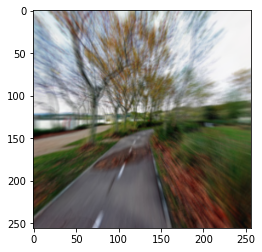

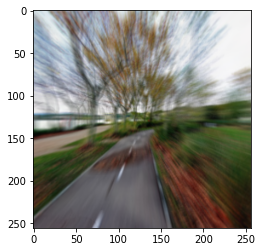

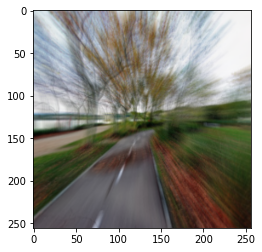

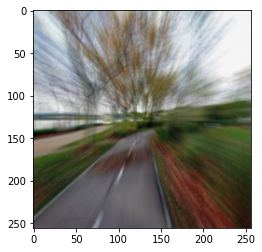

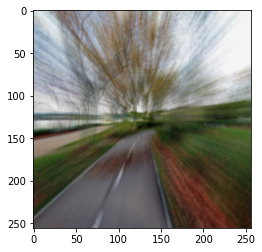

zoom_blur 1.2009754180908203


In [14]:
for corruption in get_corruption_names('blur'):
    tic = time.time()
    for severity in range(5):
        corrupted = corrupt(img, corruption_name=corruption, severity=severity+1)
        plt.imshow(corrupted)
        plt.show()
    print(corruption, time.time() - tic)